# Introduction of some useful tools
1. Anaconda
2. Pytorch
3. Jupyter Notebook
4. Some examples: use Jupyter Notebook to do programing with Python and Pytorch





# 1. Anaconda (package installer)
Anaconda is a free and open-source distribution of the Python and R programming languages for scientific computing (data science, machine learning applications, large-scale data processing, predictive analytics, etc.), that aims to simplify package management and deployment. Package versions are managed by the package management system conda. The Anaconda distribution includes data-science packages suitable for Windows, Linux, and MacOS.

    Install Anaconda (Recommend: Python 3.7 version, Command Line version) from 
    https://www.anaconda.com/distribution/


# 2. PyTorch 
Pytorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing. It is primarily developed by Facebook's AI Research lab. It is free and open-source software.


    Install Pytorch from https://pytorch.org/ , or use 

    conda install pytorch torchvision -c pytorch
    
    Note: Pytorch (installed with the way introduced above) has a built-in Python, so we do not need to install an additional Python.

# 3. Jupyter Notebook 
Jupyter Notebook is a web-based interactive computational environment for creating Jupyter notebook documents. A Jupyter Notebook document contains an ordered list of input/output cells which can contain code, text (using Markdown), mathematics, plots and rich media, usually ending with the ".ipynb" extension. 

    e.g. This is an example of Markdown cell with Latex equations.
$$f(x)=x^2+\frac{1}{2}$$

In [5]:
# e.g. This is an example of python code cell.
import torch
x= 1 + 2 
print('x=',x)


x= 3


    A Jupyter Notebook can be converted to a number of open standard output formats (HTML, presentation slides, LaTeX, PDF, ReStructuredText, Markdown, Python) through "Download As" in the web interface, via the nbconvert library or "jupyter nbconvert" command line interface in a shell. (Student can do their hw with Jupyter notebook, then submit a .ipynb file. Then the grader can run the code)

    Install Jupyter Notebook from https://jupyter.org/install, or use
    conda install -c conda-forge notebook
    
    Run Jupyter Notebook:
    Step 1: jupyter notebook in command line
    Step 2: Find the link shows in the command line
    Step 3: Open the link with your browser

For teaching purpose, we can create some public jupyter notebook files. For example, use DGX1 to create some files and share them with the students. How?

Step 1: Open your VPN 'cisco anyconnect'

Step 2: Enter the public address: http://10.136.3.36:8888/tree/math497

Step 3: Click log in (no password)

# 4. Use Jupyter Notebook to do programing with Python

# Example 1: create A vector and a matrix (generally use tensors in Pytorch) and solve $Ax=b$

# $$
A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}, \quad\quad 
b=\begin{bmatrix} 1  \\ 2 \\ 3 \end{bmatrix}
$$

   

In [165]:
import torch

# A line started with a pound sign means it is a comment line
# We can initialize a matrix as a pytorch tensor:
A = torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=torch.float32) 
print('A is', A)


# Print an empty line.
print('\n') 

# We can initialize a column vection as a pytorch tensor:
b = torch.tensor([[1],[2],[3]],dtype=torchb.float32) 
print('b is', b)


A is tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


b is tensor([[1.],
        [2.],
        [3.]])


In [178]:
x, LU =torch.solve(b,A) 
print('x is', x)

x is tensor([[ 9.9341e-09],
        [-1.9868e-08],
        [ 3.3333e-01]])


In [143]:
# We can also initialize a zeroed tensor and check the data type of the tensor
c1 = torch.zeros([2,2])
print('c1 is:', c1) 
print('Type of c1:', c1.dtype) 

# Print an empty line.
print('\n') 

# Note that the default type of such a tensor is a 32-bit float.
c2 = torch.zeros([2,2], dtype=torch.int32)
print('c2 is', c2)
print('Type of c2:', c2.dtype)

c1 is: tensor([[0., 0.],
        [0., 0.]])
Type of c1: torch.float32


c2 is tensor([[0, 0],
        [0, 0]], dtype=torch.int32)
Type of c2: torch.int32


In [125]:
# some basic operations

# plus
c = c1 + 1
print(c)

c[0,0] += 1
print(c)

tensor([[1., 1.],
        [1., 1.]])


tensor([[2., 1.],
        [1., 1.]])


In [126]:
# multiply
c *= 2
print(c)

print('\n')

# multiplication of a matrix and a vector (generally two size-matched tensors)

d = torch.tensor([[1],[2]],dtype=torch.float32) 
c = torch.mm(c,d)
print(c)


tensor([[4., 2.],
        [2., 2.]])


tensor([[8.],
        [6.]])


# Exercise 1.1: Given $P=\begin{bmatrix} 1 & 2 \\ 3 & 4\end{bmatrix}$, investigate the two different multiplications $A*A$ and $torch.mm(A,A)$.

# Exercise 1.2: Given 
# $$
A=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}, \quad\quad 
b=\begin{bmatrix} 1  \\ 2 \\ 3 \end{bmatrix}.
$$
# Solve $A^2 x = b$

# Example 2: Calculate the derivate of $(x\cdot y)^2$  w.r.t  $x$.

In [183]:
# In order to calculate the gradient with respect to a tensor, we should set the requires_grad flag to True.
x = torch.tensor([1.0, 0.0], requires_grad=True)
y = torch.tensor([1.0, 1.0])

# By default, requires_grad is set to False if possible.
print('x requires_grad?', x.requires_grad)
print('y requires_grad?', y.requires_grad)

z = torch.dot(x, y)
print('z.requires_grad?', z.requires_grad)

out = z * z

# Calculate the derivative of out w.r.t. x. Automatically applies the chain rule as needed.
grad = torch.autograd.grad(outputs=out, inputs=x) 
print(grad)

x requires_grad? True
y requires_grad? False
z.requires_grad? True
(tensor([2., 2.]),)


# Exercise 2: Given $x=\begin{bmatrix} 1 , 2 , 3 \end{bmatrix}$ and $y=\begin{bmatrix} 4  , 5 , 6 \end{bmatrix}$, Calculate the derivate of $x^2+y^2+(x\cdot y)^3$ w.r.t $y$.

# Example 3: Plot a curve

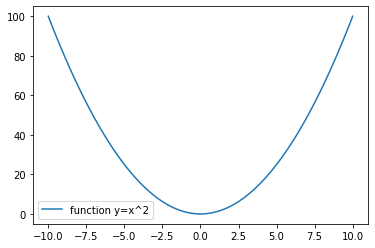

In [206]:
import torch
import matplotlib.pyplot as plt

#generate a linear space with torch.linspace(start, end, steps)
x=torch.linspace(-10, 10, 100)
# y=x^2
y = x**2
plt.plot(x, y, label='function y=x^2')
plt.legend()

# Example 4: In this example, we illustrate how to implement the pointwise ReLU function and plot a function
(Note: ReLU function is of course already implemented in Pytorch, but this process can be used to define more comlicated custom functions as well). 


In [2]:
class MyReLU(torch.autograd.Function):
# The forwrd method applies the function to the input argument.
# The ctx argument can be used to cache information for the gradient computation.
    def forward(ctx, input):
    # The input is needed later to calculate the gradient.
        ctx.save_for_backward(input) 
        return input.clamp(min=0)
    # The backward method calculates the gradient of the input, given that
    # the gradient of the output is the output_grad argument.
    def backward(ctx, output_grad):
        # Recover the original input from ctx.
        input, = ctx.saved_tensors
        grad_input = output_grad.clone()
    # Zero out the output gradient where the input is negative
    # the input gradient.
        grad_input[input < 0] = 0 
        return grad_input
    # Apply the new function to a tensor.

print(MyReLU.apply(x - 0.5))
# Calculating derivatives utilizes the backward method.
z = torch.mul(MyReLU.apply(x - 0.5), y)
# In this case z is not a scalar, so we must provide the derivatives
# of the outputs. What is actually computed is the gradient of
# z dot output_grad with respect to x.
output_grad = torch.ones([2]) 
print(torch.autograd.grad(outputs=z, inputs=x, grad_outputs =output_grad))

NameError: name 'torch' is not defined